# Long Short Term Memory (LSTM)
<br>
<table><tr>
    <td> <img src="images/handwriting.png" width="300" align = left/> </td>
    <td> <img src="images/speech recognition.jpg" width="300" align = left/> </td>
    <td> <img src="images/anomaly detection.png" width="300" align = left/> </td>
</tr></table>
<br>
Long short-term memory (LSTM) adalah arsitektur Recurrent Neural Network (RNN) yang digunakan pada bidang deep learning. Tidak seperti feed forward neural network biasa, LSTM memiliki koneksi umpan balik sehingga LSTM dapat memproses tidak hanya data tunggal (seperti gambar), tetapi juga seluruh urutan data (seperti ucapan atau video). LSTM mampu melakukan tugas-tugas seperti handwriting recognition, speech recognition dan anomaly detection pada network traffic atau IDSs (intrusion detection systems).

## Recurrent Neural Network (RNN)

<img src="images/DavidRumelhart.jpg" width="300"/>
<p style = "text-align:center;font-size:24px">David Rumelhart</p>

image source: https://en.wikipedia.org/wiki/Recurrent_neural_network

## Feed-forward Neural Network Vs Recurrent Neural Network
<img src="images/Comparison-of-FFNN-and-RNN.png" />


- Struktur Recurrent Neural Network (RNN) 
<img src="images/struktur rnn.jpg" />


## Long Short Term Memory (LSTM)
<table><tr>
    <td> <img src="images/Jurgen Schmidhuber.jpg" width="200"/> </td>
    <td> <img src="images/SeppHochreiter.jpg" width="200"/> </td>
</tr><tr>
    <td> <p style = "text-align:center;font-size:18px">Jurgen Schmidhuber</p> </td>
    <td> <p style = "text-align:center;font-size:18px">Sepp Hochreiter</p> </td>
</tr></table>

image source: https://en.wikipedia.org/wiki/Recurrent_neural_network

- LSTM Vs RNN
<img src="images/RNN VS LSTM.jpg"/>


- Cara kerja LSTM
<img src="images/forget gate.gif" width="700" />
<img src="images/input gate.gif" width=700 />
<img src="images/cell state.gif" width=700 />
<img src="images/output gate.gif" width=700 />

image source:https://www.megabagus.id/deep-learning-recurrent-neural-networks/4/

## LSTM for forecasting

- Sliding Window
<img src="images/sliding window.gif" width=700 />

## LSTM menggunakan Tensorflow dan Keras
- tensorflow: https://www.tensorflow.org/overview
- keras: https://keras.io/about/

### Membuat model LSTM sederhana dengan data sekuensial berikut

<p style="text-align:center;font-size:18px">$(10,20,30,40,50,60,70,80,90,100,...,1000)$</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate data from 1,2,3,...1000
seq = np.arange(10, 1001, 10)
seq

array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  210,  220,
        230,  240,  250,  260,  270,  280,  290,  300,  310,  320,  330,
        340,  350,  360,  370,  380,  390,  400,  410,  420,  430,  440,
        450,  460,  470,  480,  490,  500,  510,  520,  530,  540,  550,
        560,  570,  580,  590,  600,  610,  620,  630,  640,  650,  660,
        670,  680,  690,  700,  710,  720,  730,  740,  750,  760,  770,
        780,  790,  800,  810,  820,  830,  840,  850,  860,  870,  880,
        890,  900,  910,  920,  930,  940,  950,  960,  970,  980,  990,
       1000])

In [2]:
def sliding_window(seq, window_size):
    sub_seq, next_values = [], []
    for i in range(len(seq)-window_size):  
        sub_seq.append(seq[i:i+window_size])
        next_values.append(seq[i+window_size])
    X = np.array(sub_seq).reshape(len(seq)-window_size,window_size,1)
    y = np.array([next_values]).T
    return X,y

In [3]:
# Membuat Supervised Problem (Sliding Window)

window_size = 5

X, y  = sliding_window(seq, window_size)

In [4]:
X.shape, y.shape

((95, 5, 1), (95, 1))

In [5]:
X[:3,:,0], y[:3]

(array([[10, 20, 30, 40, 50],
        [20, 30, 40, 50, 60],
        [30, 40, 50, 60, 70]]),
 array([[60],
        [70],
        [80]]))

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [7]:
# Set up network
model = Sequential()
model.add(LSTM(100, activation='relu',input_shape=(window_size,1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [8]:
# fit model

history = model.fit(X,y, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

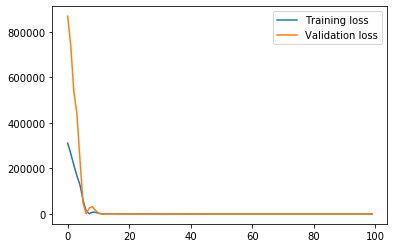

In [9]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [10]:
mse = model.evaluate(X,y)
mse

3/3 [==============================] - 0s 3ms/step - loss: 0.2426


0.24263040721416473

In [12]:
# forecasting data selanjutnya (1010,1020,1030,...)

n_future = 5
future = []
X_new = [960,970,980,990,1000]

for i in range(n_future):
    y_pred = model.predict(np.array([X_new]).reshape(1,5,1))
    future.append(y_pred[0,0])
    X_new = X_new[1:]
    X_new.append(y_pred[0,0])
    
print(future)

[1012.22424, 1022.5727, 1033.348, 1044.1868, 1055.297]
